# Image Processing With Machine Learning
Date: 22 December 2019
<br> Course: Convolutional Neural Netwroks for Image Processing 
<br> link: https://www.datacamp.com/courses/convolutional-neural-networks-for-image-processing

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from keras.utils import normalize
from keras.layers import Conv2D, Flatten, Dense
from keras.models import Sequential

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> یکی از نقاط قوت شبکه ی عصبی کانولوشنال اینه که می تونه از چندین و چند لایه ی کانولوشنال تشکیل بشه و به خاطر همین هم بهش میگن دیپ لرنینگ. چرا ما به لایه های کانولوشن زیاد احتیاج داریم؟ چرا؟ مثلا در شکل زیر یه شبکه ی عصبی کانولوشنال رو میبینی که توسط ریسرچرای گوگل طراحی شده است که 22 تا لایه ی کانولوشنال داره به اضافه ی چندتا لایه ی دیگه که هنوز نشناختیم و در ادامه توضیح میدهیم

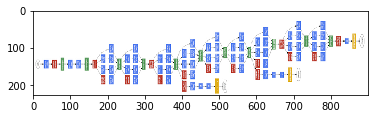

In [4]:
google = plt.imread('Photos/GOOGLEcnn.PNG')
plt.imshow(google)
plt.show()

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> دلیل اینکه این لایه ها کار میکنند اینه که لایه ی کانولوشن بعدی دارن روی فیچر مپ پردازش می کنند و هی همینطور که جلو میریم هی فیچر ها و پترن های پیچیده تری رو کشف میکنند. برای اینکه متوجه بشی به شکل زیر نگاه کن

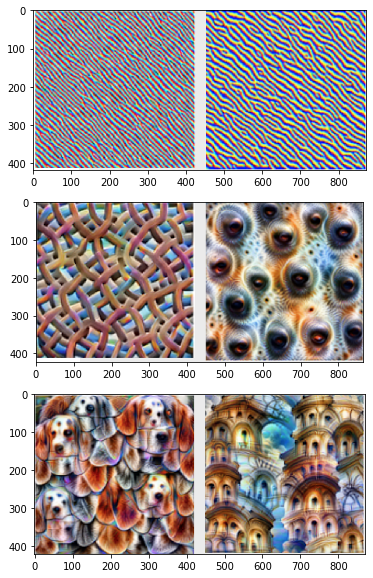

In [6]:
early_pattern = plt.imread('Photos/early_patterns.PNG')
intermediate_pattern = plt.imread('Photos/intermediate_patterns.PNG')
late_pattern = plt.imread('Photos/late_patterns.PNG')

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 10))
ax[0].imshow(early_pattern)
ax[1].imshow(intermediate_pattern)
ax[2].imshow(late_pattern)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> در ردیف اول پترن هایی رومیبینی که لایه های اولیه می تونن استخراج کنند یه سری خطوط رو در تصویر پیدا می کنند
            <br> لایه های میانی قدرت این رو دارند که یه سری پترن های پیچیده تری که شامل یه سری آبجکت های ساده مثل چشم هستند رو تشخیص بدهند. که این پترن ها رو در ردیف دوم می تونی ببینی
            <br> همین طور که اطلاعات داره سفر میکنه از لایه ی اولیه ی شبکه به لایه های پایانی، فیچر مپ ها شروع میکنند به شناختن آبجکت های پیچیده تر مثل خونه و سگ و گربه و غیره ( که در ردیف سوم میبینی)
            <br> و در کل این مساله به لای ی دِنس آخر اجازه میده که اطلاعات لازم برای کلاس بندی تصویر رو بر اساس این فیچر مپ ها بده
            <br> حالا بذار همون مثال قبلی رو با دو تا لایه ی کانولوشن حل کنیم
            <br>
            <br>
            <br> اول بذار داده ها رو لود و پردازش کنیم

In [9]:
# A function offered by the website itself to read the data batches
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch_training_01 = unpickle('cifar-10-batches-py/data_batch_1')

batch01_data = batch_training_01.pop(b'data')
batch01_label = batch_training_01.pop(b'labels')

def gray_batch_converter(batch01_data):
    gray = lambda rgb: np.dot(rgb[:,:,:3], [0.299 , 0.587, 0.114])
    batch01_data_gs = np.zeros((10000,1024),dtype = 'uint8')
    row_number = 0
    for row in batch01_data:
        img_cl = np.zeros((32,32,3),dtype='uint8')
        img_cl[:,:,0] = row[0:1024].reshape(32,32)
        img_cl[:,:,1] = row[1024:2048].reshape(32,32)
        img_cl[:,:,2] = row[2048:3072].reshape(32,32)    
        img_gs = gray(img_cl)
        batch01_data_gs[row_number] = img_gs.reshape(1,1024)
        row_number = row_number + 1
    return batch01_data_gs

batch01_data_gs = gray_batch_converter(batch01_data)

train_input = batch01_data_gs[0:9500,0:1024]
train_output = batch01_label[0:9500]
test_input = batch01_data_gs[9500:10000,0:1024]
test_output = batch01_label[9500:10000]

train_output_ohe = to_categorical(train_output)
test_output_ohe = to_categorical(test_output)

from keras.utils import normalize
train_input_norm = normalize(train_input)
test_input_norm = normalize(test_input)

train_input_norm_img = train_input_norm.reshape(9500,32,32,1)
test_input_norm_img = test_input_norm.reshape(500,32,32,1)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> حالا مدل رو ترین میکنیم

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

shah_classifier4 = Sequential()
shah_classifier4.add(Conv2D(15, kernel_size=3, activation = 'relu', input_shape = (32,32,1), padding='same'))
shah_classifier4.add(Conv2D(10, kernel_size=3, activation = 'relu', padding='same'))
shah_classifier4.add(Flatten())
shah_classifier4.add(Dense(10, activation='softmax'))

shah_classifier4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

shah_stats4 = shah_classifier4.fit(train_input_norm_img, train_output_ohe, epochs=15, validation_split=0.2)

Train on 7600 samples, validate on 1900 samples
Epoch 1/15
7600/7600 [==============================] - 24s 3ms/step - loss: 2.1175 - acc: 0.2276 - val_loss: 2.0163 - val_acc: 0.2995
Epoch 2/15
7600/7600 [==============================] - 23s 3ms/step - loss: 1.9839 - acc: 0.3043 - val_loss: 1.9806 - val_acc: 0.3100
Epoch 3/15
7600/7600 [==============================] - 24s 3ms/step - loss: 1.9168 - acc: 0.3380 - val_loss: 1.9168 - val_acc: 0.3342
Epoch 4/15
7600/7600 [==============================] - 23s 3ms/step - loss: 1.8411 - acc: 0.3691 - val_loss: 1.8811 - val_acc: 0.3484
Epoch 5/15
7600/7600 [==============================] - 26s 3ms/step - loss: 1.7603 - acc: 0.3921 - val_loss: 1.8610 - val_acc: 0.3516
Epoch 6/15
7600/7600 [==============================] - 24s 3ms/step - loss: 1.7071 - acc: 0.4087 - val_loss: 1.8044 - val_acc: 0.3768
Epoch 7/15
7600/7600 [==============================] - 23s 3ms/step - loss: 1.6747 - acc: 0.4270 - val_loss: 1.7880 - val_acc: 0.3800
Epoch 8

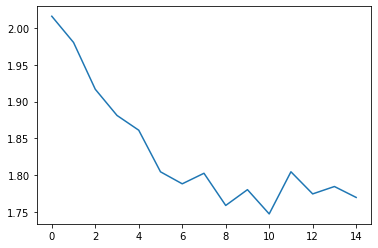

In [12]:
plt.plot(shah_stats4.history['val_loss'])

# Number of parameters

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> مساله ی بعدی ای که میخوایم در نظر بگیریم اینه که وقتی یه استراکچری برای مدل مطرح میکنیم باید ببینیم که چندتا پارامتر برای ترین کردن داره. این رو با دو تا مثال بررسی میکنیم
            <br> مثال اول یه شبکه با سه تا لایه ی فولی کانکتد هست که ورودی اش یه تصویر با ابعاد 28 در 28 هست
            <br> که الآن من میشینم تعداد پارامتر ها رو میشمارم 

In [7]:
model_dense = Sequential()
model_dense.add(Dense(10, activation='relu', input_shape=(784,)))
model_dense.add(Dense(10, activation='relu'))
model_dense.add(Dense(3, activation='softmax'))

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> در لایه ی اول 10 تا لایه داره که هر کدوم به تمام پیکسل ها وزن دارند به اضافه ی اینکه هر لایه یه پارامتر هم برای بایاس داره
            <br> 10 * 784 + 10 = 7850
            <br> لایه ی دوم ده تا نورون داره که هر کدوم به هر ده تا نورون قبلی وزن دارند به اضافه ی اینکه هر کدوم یه پارامتر بایاس هم دارند
            <br> 10 * 10 + 10 = 110
            <br> در لایه آخر سه نورون داریم که هر نورون به هر ده تا نورون لایه ی قبل وزن دارند و هر کدوم یه پارامتر به نام بایاس دارند
            <br> 3 * 10 + 3 = 33
            <br> که البته با متدی به اسم سامری یه خلاصه از شبکه ای که ساختی بهت نشون داده میشه و هر لایه جداکانه توضیح داده می شه به اضافه ی تعداد پارامتر ها

In [8]:
model_dense.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 33        
Total params: 7,993
Trainable params: 7,993
Non-trainable params: 0
_________________________________________________________________


<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> حالا برای یه شبکه با لایه کانولوشون با تعداد یکسانی نورون این پارامتر ها چقدر خواهند بود؟

In [9]:
model_CNN = Sequential()
model_CNN.add(Conv2D(10,kernel_size=3, activation='relu', input_shape=(28,28,1), padding='same'))
model_CNN.add(Conv2D(10,kernel_size=3, activation='relu', padding='same'))
model_CNN.add(Flatten())
model_CNN.add(Dense(3,activation='softmax'))

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> در لایه اول 10 تا نورون داریم که هر کدوم فقط به تعداد سایز کرنل یعنی 9 تا وزن دارند به اضافه ی یه پارامتر برای بایاس
            <br> 10 * 9 + 10 = 100
            <br> لایه دوم یه نکته ی خیلی ریز داره و اونم اینه که هر نورون در لایه ی دوم از طریق کرنل جدا جدا به هر ده تا فیچر مپ خارج شده از لایه ی اول وصل میشه پس به ازای هر نورون ما 9 تا وزن تا کرنل داریم که بعد به هر ده تا فیچر مپ میره پس اینطوری میشه: (البته بایاس رو یادت نره)
            <br> 10 * 9 * 10 + 10 = 910
            <br> لایه ی بعدی یه لایه فلتن هست که هیچ پارامتری نداره. که خب البته این مهمه که فلتن چندتا پیکسل درست میکنه؟ زیرو پدینگ داشتیما، حواست باشه 
            <br> 10 * 784
            <br> لایه ی آخر که فولی کانکتد هست 3 تا نورون داره که هر کدوم به تمام پیکسل ها وزن داره پس مشه
            <br> 7840 * 3 + 3
            <br> که در نهایت داریم

In [10]:
model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 10)        910       
_________________________________________________________________
flatten_1 (Flatten)          (None, 7840)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 23523     
Total params: 24,533
Trainable params: 24,533
Non-trainable params: 0
_________________________________________________________________


<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> بنابراین استفاده از لایه ی کانولوشن الزاما تعداد پارامتر ها رو کم نمیکنه بلکه دیدی الآن که چقدر بیشتر میکنه
            <br> دو تا مثال دیگه بزنیم

In [11]:
model_dense2 = Sequential()
model_dense2.add(Dense(5, activation='relu', input_shape=(784,)))
model_dense2.add(Dense(15, activation='relu'))
model_dense2.add(Dense(3, activation='softmax'))
model_dense2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dense_9 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 48        
Total params: 4,063
Trainable params: 4,063
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_CNN2 = Sequential()
model_CNN2.add(Conv2D(5, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='same'))
model_CNN2.add(Conv2D(15, kernel_size=3, activation='relu', padding='same'))
model_CNN2.add(Flatten())
model_CNN2.add(Dense(3, activation='softmax'))
model_CNN2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 5)         50        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 15)        690       
_________________________________________________________________
flatten_3 (Flatten)          (None, 11760)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 35283     
Total params: 36,023
Trainable params: 36,023
Non-trainable params: 0
_________________________________________________________________


<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> همونطور که دیدی در مدل دِنس، توی لایه های اول تعداد پارامترها خیلی زیاده و هر چی جلوتر میریم تعداد پارامتر ها کمتر میشه. این مساله در مورد مدل سی ان ان برعکسه. در لایه های اول تعداد پارامتر ها کمه و بعد درلایه های بعدی خیلی زیاد میشه
            <br> در واقع میشه اینطور گفت که مدل های کانولوشن دار قدرت نمایانگریه بیشتری دارند بنابراین به پارمترهای کمتری احتیاج دارند ولی خوندن این بیان هایی که لایه های کانولوشن ارائه میدهند از اطلاعات داخل تصاویر، از منظر پارامتر هزینه بر هستند و اون موقع هست که به کلی پارمتر در لایه ی خروجی احتیاج داریم